In [5]:
from crim_intervals import * 
import crim_intervals.visualizations as viz
%matplotlib inline

from IPython.display import YouTubeVideo

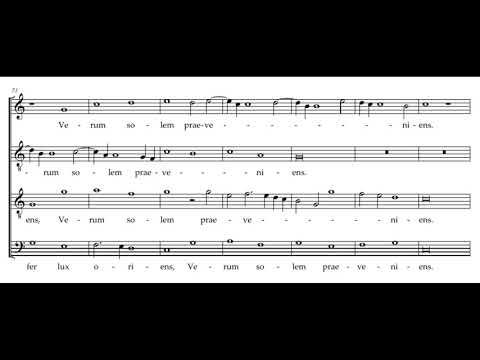

In [6]:
YouTubeVideo('s-pVbpV4yuk', width=800, height=400)

In [3]:
piece = importScore('https://crimproject.org/mei/CRIM_Model_0008.mei')

In [7]:
piece.metadata

{'title': 'Ave Maria', 'composer': 'Josquin Des Prés', 'date': 1502}

In [10]:
notes = piece.notes()

notes

,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,NaN,NaN,NaN
12.0,C5,NaN,NaN,NaN
16.0,D5,G3,NaN,NaN
20.0,E5,C4,NaN,NaN
...,...,...,...,...
1248.0,C5,E4,C4,A3
1252.0,NaN,F4,NaN,NaN
1256.0,B4,G4,D4,G3
1272.0,C5,G4,C4,C3


In [11]:
notes.T

,0.0,4.0,12.0,16.0,20.0,24.0,28.0,32.0,36.0,40.0,...,1224.0,1232.0,1236.0,1240.0,1244.0,1248.0,1252.0,1256.0,1272.0,1288.0
[Superius],G4,C5,C5,D5,E5,C5,NaN,Rest,NaN,NaN,...,E5,Rest,E5,E5,D5,C5,NaN,B4,C5,C5
Altus,Rest,NaN,NaN,G3,C4,NaN,C4,D4,E4,C4,...,G4,Rest,G4,G4,G4,E4,F4,G4,G4,G4
Tenor,Rest,NaN,NaN,NaN,NaN,NaN,NaN,G3,C4,NaN,...,C4,Rest,C4,C4,B3,C4,NaN,D4,C4,C4
Bassus,Rest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C3,Rest,C3,C4,G3,A3,NaN,G3,C3,C3


In [17]:
piece.cvfs()

,[Superius],Altus,Tenor,Bassus
Last,,,,
188.0,NaN,T,C,b
232.0,C,u,T,b
272.0,C,T,NaN,NaN
304.0,NaN,A,C,T
416.0,C,NaN,T,B
472.0,C,T,B,NaN
512.0,t,NaN,C,T
608.0,C,NaN,T,B
640.0,T,C,NaN,NaN


In [28]:
cadences = piece.cadences()

In [29]:
cadences

,CadType,LeadingTones,CVFs,Low,RelLow,Tone,RelTone,TSig,Measure,Beat,Sounding,Progress,SinceLast,ToNext
Last,,,,,,,,,,,,,,
188.0,Evaded Authentic,1.0,TCb,E3,M3,G,P5,4/2,24,3.0,3.0,0.145963,188.0,44.0
232.0,Evaded Authentic,1.0,CuTb,A2,-m3,C,P8,4/2,30,1.0,4.0,0.180124,44.0,40.0
272.0,Phrygian Clausula Vera,1.0,CT,E4,M10,E,M3,4/2,35,1.0,2.0,0.211180,40.0,32.0
304.0,Phrygian Clausula Vera,1.0,ACT,E3,M3,E,M3,4/2,39,1.0,3.0,0.236025,32.0,112.0
416.0,Authentic,1.0,CTB,C3,P1,C,P8,4/2,53,1.0,4.0,0.322981,112.0,56.0
472.0,Authentic,1.0,CTB,C3,P1,C,P8,4/2,60,1.0,4.0,0.366460,56.0,40.0
512.0,Clausula Vera,1.0,tCT,C3,P1,C,P8,4/2,65,1.0,3.0,0.397516,40.0,96.0
608.0,Authentic,1.0,CTB,C3,P1,C,P8,4/2,77,1.0,3.0,0.472050,96.0,32.0
640.0,Clausula Vera,1.0,TC,C3,P1,G,P5,4/2,81,1.0,4.0,0.496894,32.0,24.0


In [31]:
cadences["Tone"].value_counts()

C    9
G    6
E    3
Name: Tone, dtype: int64

In [30]:
cadences_G = cadences[ cadences["Tone"] == "G" ] # read: "Show me the cadences, where the cadence is on tone G.

In [27]:
piece.verovioCadences(cadences_G)

[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] 4 time pointing element(s) could not be matched in measure m-4149
[Warning] 4 time pointing element(s) could not be matched in measure m-4132
[Warning] 4 time pointing element(s) could not be matched in measure m-4098


In [32]:
cadences

,CadType,LeadingTones,CVFs,Low,RelLow,Tone,RelTone,TSig,Measure,Beat,Sounding,Progress,SinceLast,ToNext
Last,,,,,,,,,,,,,,
188.0,Evaded Authentic,1.0,TCb,E3,M3,G,P5,4/2,24,3.0,3.0,0.145963,188.0,44.0
232.0,Evaded Authentic,1.0,CuTb,A2,-m3,C,P8,4/2,30,1.0,4.0,0.180124,44.0,40.0
272.0,Phrygian Clausula Vera,1.0,CT,E4,M10,E,M3,4/2,35,1.0,2.0,0.211180,40.0,32.0
304.0,Phrygian Clausula Vera,1.0,ACT,E3,M3,E,M3,4/2,39,1.0,3.0,0.236025,32.0,112.0
416.0,Authentic,1.0,CTB,C3,P1,C,P8,4/2,53,1.0,4.0,0.322981,112.0,56.0
472.0,Authentic,1.0,CTB,C3,P1,C,P8,4/2,60,1.0,4.0,0.366460,56.0,40.0
512.0,Clausula Vera,1.0,tCT,C3,P1,C,P8,4/2,65,1.0,3.0,0.397516,40.0,96.0
608.0,Authentic,1.0,CTB,C3,P1,C,P8,4/2,77,1.0,3.0,0.472050,96.0,32.0
640.0,Clausula Vera,1.0,TC,C3,P1,G,P5,4/2,81,1.0,4.0,0.496894,32.0,24.0


In [34]:
piece.ngrams()

,Bassus_Tenor,Bassus_Altus,Bassus_[Superius],Tenor_Altus,Tenor_[Superius],Altus_[Superius]
16.0,NaN,NaN,NaN,NaN,NaN,"12_4, 10_Held, 8"
20.0,NaN,NaN,NaN,NaN,NaN,"10_Held, 8_1, 8"
32.0,NaN,NaN,NaN,"5_4, 3_Held, 1",NaN,NaN
36.0,NaN,NaN,NaN,"3_Held, 1_1, 1",NaN,NaN
48.0,"12_4, 10_Held, 8",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1240.0,"1_-4, 3_2, 3","5_-4, 8_2, 5","10_-4, 12_2, 10","5_-2, 6_2, 3","10_-2, 10_2, 8","6_1, 5_-3, 6"
1244.0,"3_2, 3_-2, 5","8_2, 5_Held, 6","12_2, 10_-2, 10","6_2, 3_Held, 4","10_2, 8_2, 6","5_-3, 6_2, 5"
1248.0,"3_-2, 5_-5, 8","5_Held, 6_-2, 8","10_-2, 10_-5, 15","3_Held, 4_2, 4","8_2, 6_-2, 8","6_2, 5_2, 3"
1252.0,NaN,"6_-2, 8_-5, 12",NaN,"4_2, 4_-2, 5",NaN,"5_2, 3_1, 4"


In [42]:
piece.melodic()

,[Superius],Altus,Tenor,Bassus
0.0,NaN,Rest,Rest,Rest
4.0,P4,NaN,NaN,NaN
8.0,NaN,Rest,Rest,Rest
12.0,P1,NaN,NaN,NaN
16.0,M2,NaN,Rest,Rest
...,...,...,...,...
1248.0,-M2,-m3,m2,M2
1252.0,NaN,m2,NaN,NaN
1256.0,-m2,M2,M2,-M2
1272.0,m2,P1,-M2,-P5


In [54]:
piece.final()

'C3'

TypeError: show() got an unexpected keyword argument 'renderer'

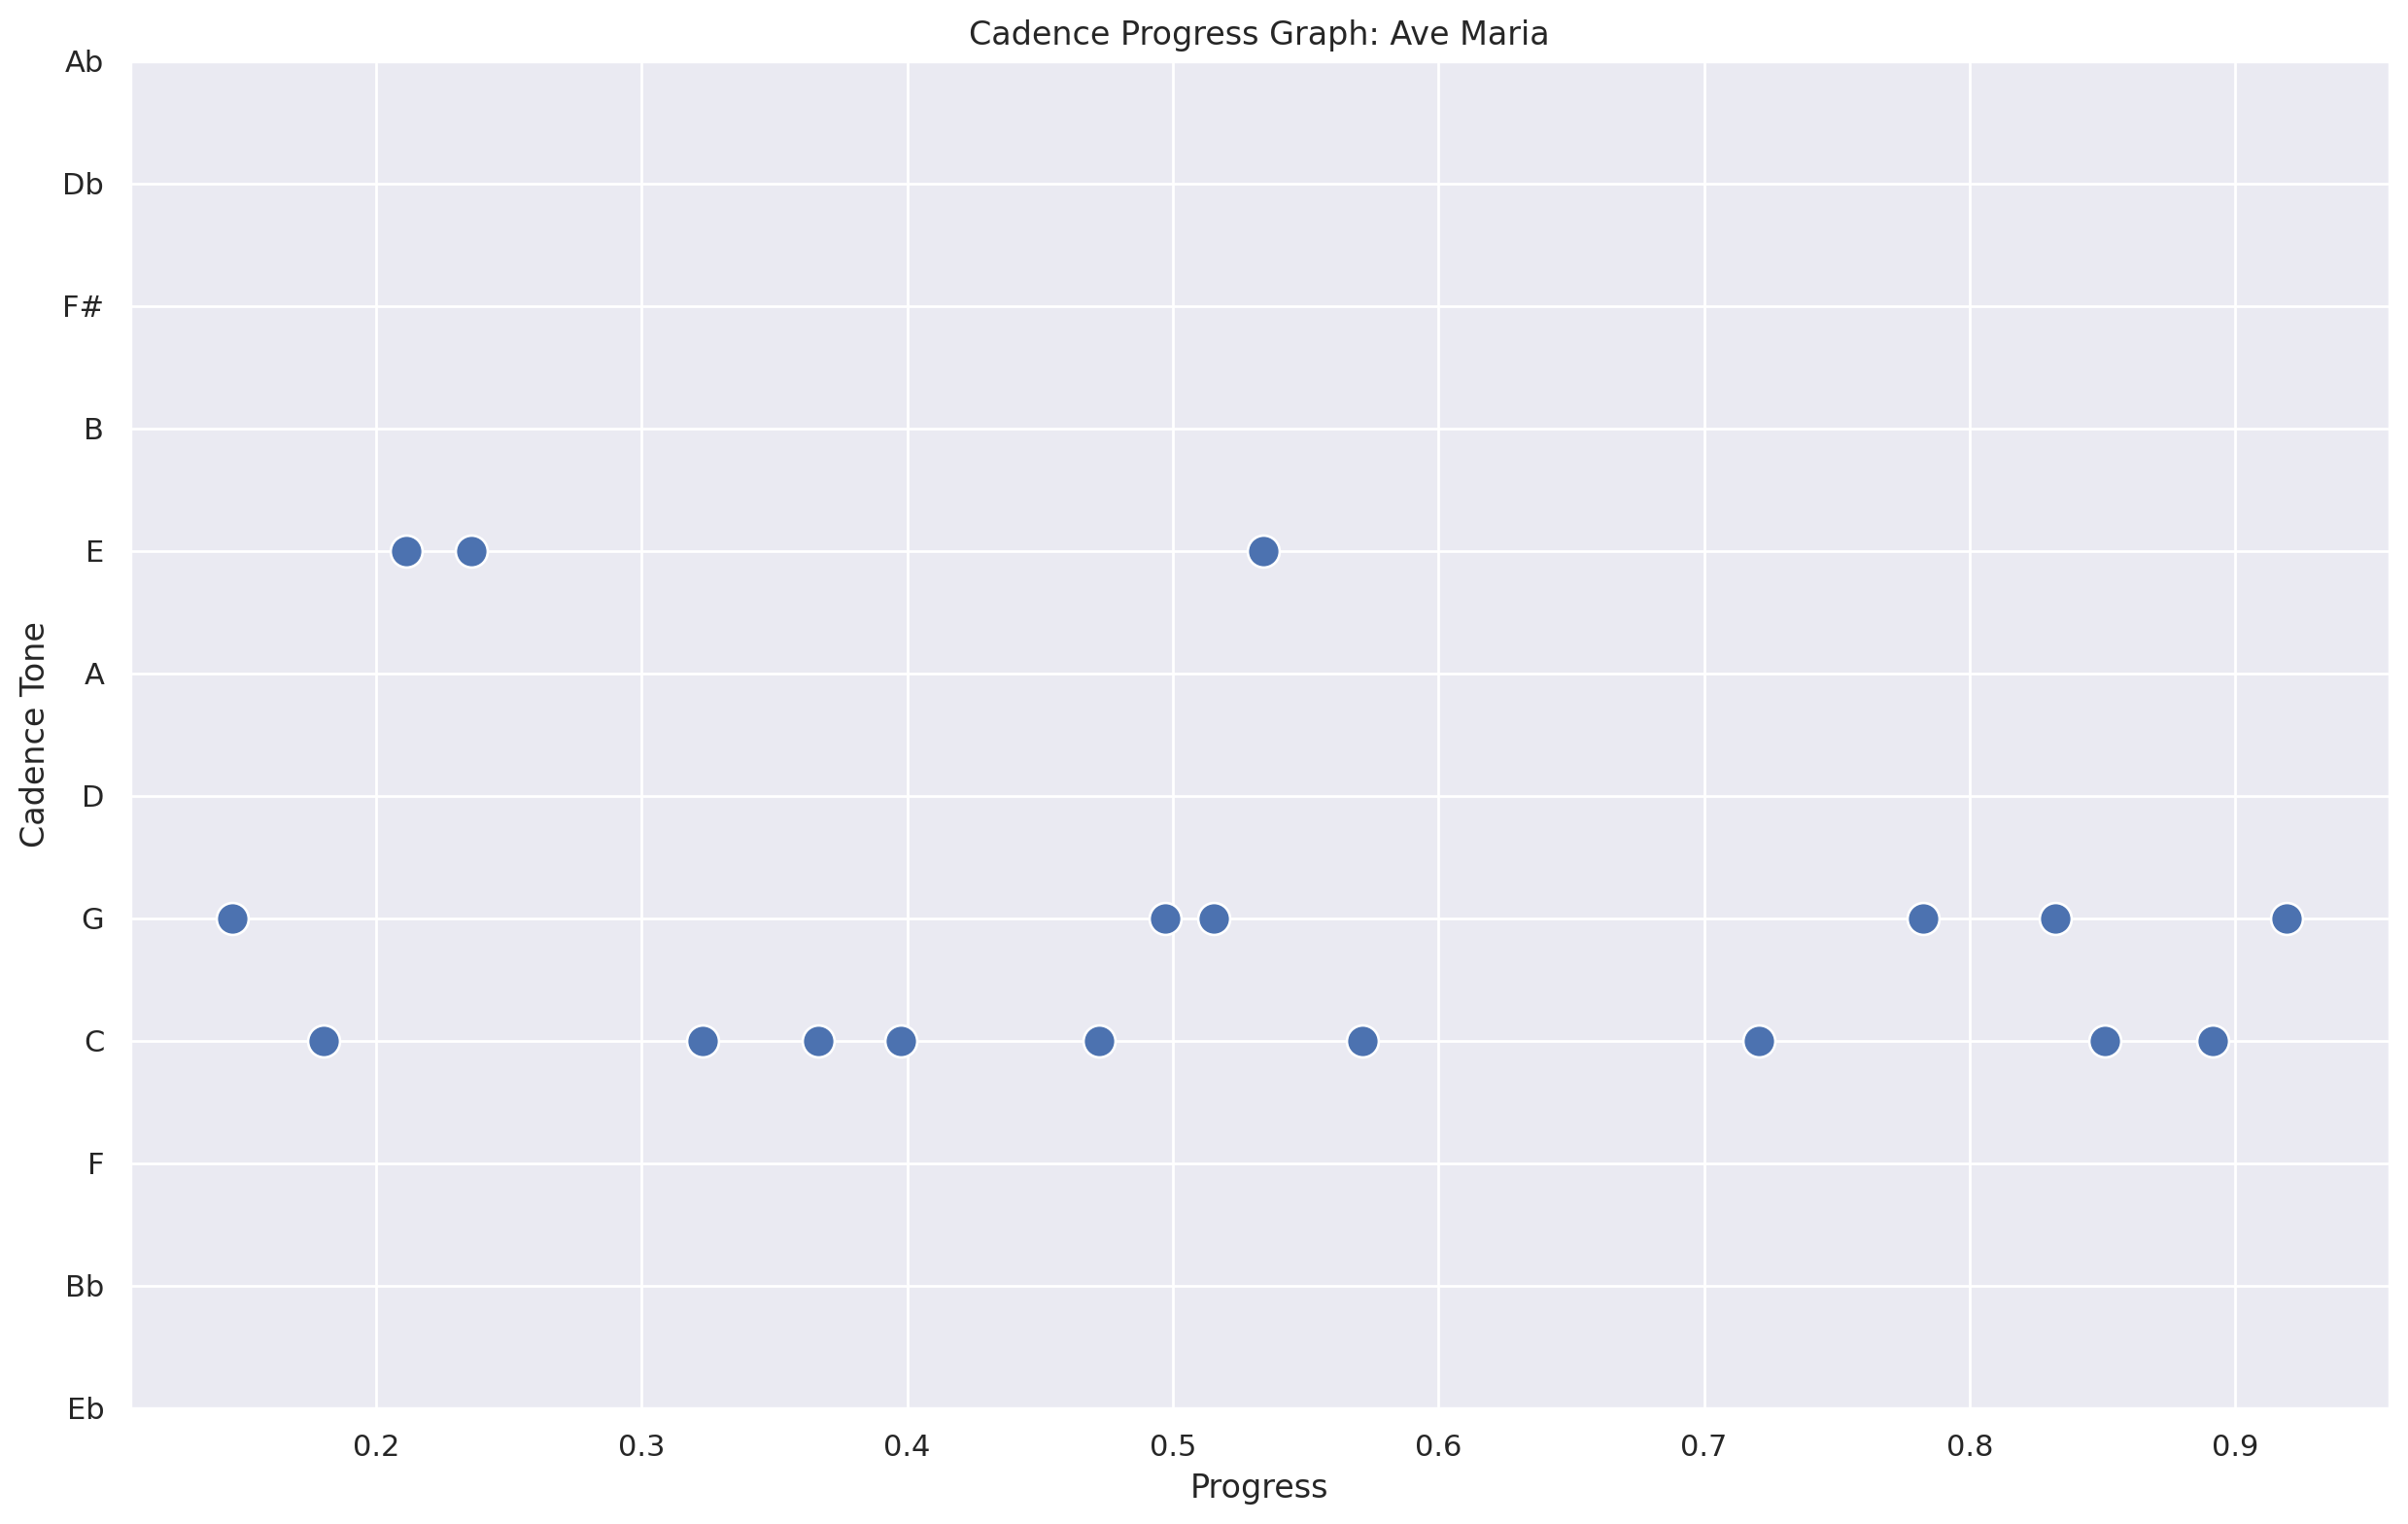

In [58]:
piece.cadenceProgressPlot()

In [59]:
piece.cadenceRadarPlot()

In [61]:
piece.harmonic()

,Bassus_Tenor,Bassus_Altus,Bassus_[Superius],Tenor_Altus,Tenor_[Superius],Altus_[Superius]
0.0,Rest,Rest,Rest,Rest,Rest,Rest
4.0,NaN,NaN,Rest,NaN,Rest,Rest
8.0,Rest,Rest,Rest,Rest,Rest,Rest
12.0,NaN,NaN,Rest,NaN,Rest,Rest
16.0,Rest,Rest,Rest,Rest,Rest,P12
...,...,...,...,...,...,...
1248.0,m3,P5,m10,M3,P8,m6
1252.0,NaN,m6,NaN,P4,NaN,P5
1256.0,P5,P8,M10,P4,M6,M3
1272.0,P8,P12,P15,P5,P8,P4


In [64]:
piece.melodic()

,[Superius],Altus,Tenor,Bassus
0.0,NaN,Rest,Rest,Rest
4.0,P4,NaN,NaN,NaN
8.0,NaN,Rest,Rest,Rest
12.0,P1,NaN,NaN,NaN
16.0,M2,NaN,Rest,Rest
...,...,...,...,...
1248.0,-M2,-m3,m2,M2
1252.0,NaN,m2,NaN,NaN
1256.0,-m2,M2,M2,-M2
1272.0,m2,P1,-M2,-P5


In [65]:
piece.notes()

,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,NaN,NaN,NaN
12.0,C5,NaN,NaN,NaN
16.0,D5,G3,NaN,NaN
20.0,E5,C4,NaN,NaN
...,...,...,...,...
1248.0,C5,E4,C4,A3
1252.0,NaN,F4,NaN,NaN
1256.0,B4,G4,D4,G3
1272.0,C5,G4,C4,C3


In [72]:
piece.sonorities()

,Sonority
0.0,
4.0,
8.0,
12.0,
16.0,5
...,...
1248.0,5/3
1252.0,6/3
1256.0,5/3
1272.0,5


In [76]:
piece.presentationTypes()["Presentation_Type"].value_counts()

FUGA    7
ID      4
PEN     3
NIM     2
Name: Presentation_Type, dtype: int64

In [74]:
piece.verovioPtypes()

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 1-11
Presentation Type:  PEN
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('4', '1', '2', '2')]
Melodic Entry Intervals:  ['P-8', 'P1', 'P-8']
Time Entry Intervals:  [16.0, 16.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] 4 time pointing element(s) could not be matched in measure m-4149
[Warning] 4 time pointing element(s) could not be matched in measure m-4132
[Warning] 4 time pointing element(s) could not be matched in measure m-4098


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 8-18
Presentation Type:  PEN
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('-2', '-2', '-2', '2')]
Melodic Entry Intervals:  ['P-8', 'P1', 'P-8']
Time Entry Intervals:  [16.0, 16.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 16-26
Presentation Type:  PEN
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('1', '1', '2', '2')]
Melodic Entry Intervals:  ['P-8', 'P1', 'P-8']
Time Entry Intervals:  [16.0, 16.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 23-32
Presentation Type:  FUGA
Voices:  ['Altus', 'Bassus']
Number of Entries:  2
Soggetti:  [('-3', '-2', '2', '2')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [40.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 31-39
Presentation Type:  FUGA
Voices:  ['[Superius]', 'Tenor']
Number of Entries:  2
Soggetti:  [('1', '2', '2', '1')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [32.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 31-39
Presentation Type:  FUGA
Voices:  ['Altus', 'Bassus']
Number of Entries:  2
Soggetti:  [('3', '2', '2', '1')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [32.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 31-39
Presentation Type:  NIM
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('1', '2', '2', '1'), ('3', '2', '2', '1')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [32.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 54-64
Presentation Type:  ID
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('4', '-2', '2', '2')]
Melodic Entry Intervals:  ['P-5', 'P-4', 'P-5']
Time Entry Intervals:  [4.0, 36.0, 4.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 64-73
Presentation Type:  ID
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('2', '-3', '2', '-3')]
Melodic Entry Intervals:  ['P-5', 'P-4', 'P-5']
Time Entry Intervals:  [16.0, 8.0, 16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 78-85
Presentation Type:  FUGA
Voices:  ['[Superius]', 'Tenor']
Number of Entries:  2
Soggetti:  [('1', '1', '2', '-3')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [24.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 78-85
Presentation Type:  FUGA
Voices:  ['Altus', 'Bassus']
Number of Entries:  2
Soggetti:  [('1', '1', '5', '1')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [24.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 78-85
Presentation Type:  NIM
Voices:  ['[Superius]', 'Altus', 'Tenor', 'Bassus']
Number of Entries:  4
Soggetti:  [('1', '1', '2', '-3'), ('1', '1', '5', '1')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [24.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 94-102
Presentation Type:  ID
Voices:  ['[Superius]', 'Tenor', '[Superius]', 'Tenor']
Number of Entries:  4
Soggetti:  [('1', '1', '2', '1')]
Melodic Entry Intervals:  ['P-5', 'P5', 'P-5']
Time Entry Intervals:  [4.0, 44.0, 4.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 111-126
Presentation Type:  ID
Voices:  ['[Superius]', 'Tenor', '[Superius]', 'Tenor']
Number of Entries:  4
Soggetti:  [('1', '1', '2', '-2')]
Melodic Entry Intervals:  ['P-8', 'P8', 'P-8']
Time Entry Intervals:  [24.0, 40.0, 24.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 127-133
Presentation Type:  FUGA
Voices:  ['[Superius]', 'Tenor']
Number of Entries:  2
Soggetti:  [('2', '2', '2', '-2')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [16.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
Measures: 133-140
Presentation Type:  FUGA
Voices:  ['[Superius]', 'Tenor']
Number of Entries:  2
Soggetti:  [('1', '-2', '-2', '2')]
Melodic Entry Intervals:  ['P-8']
Time Entry Intervals:  [24.0]
Flexed:  False
Parallel Entries: None
Number of Non-Overlapping Voices: 0


Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  31
HR Stop Measure:  31
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  2


[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] Unsupported '<line>' within <measure>
[Warning] 4 time pointing element(s) could not be matched in measure m-4149
[Warning] 4 time pointing element(s) could not be matched in measure m-4132
[Warning] 4 time pointing element(s) could not be matched in measure m-4098


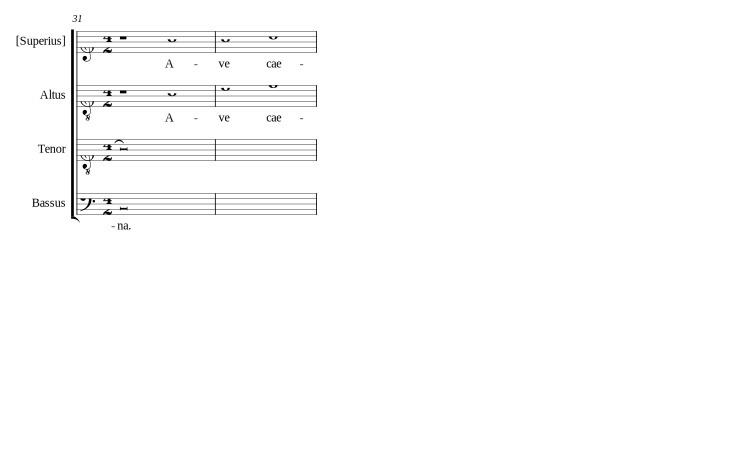

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  35
HR Stop Measure:  35
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  2


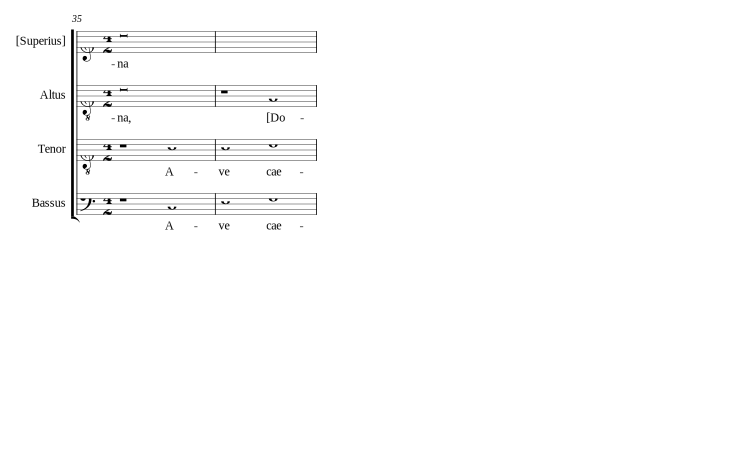

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  38
HR Stop Measure:  39
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  3


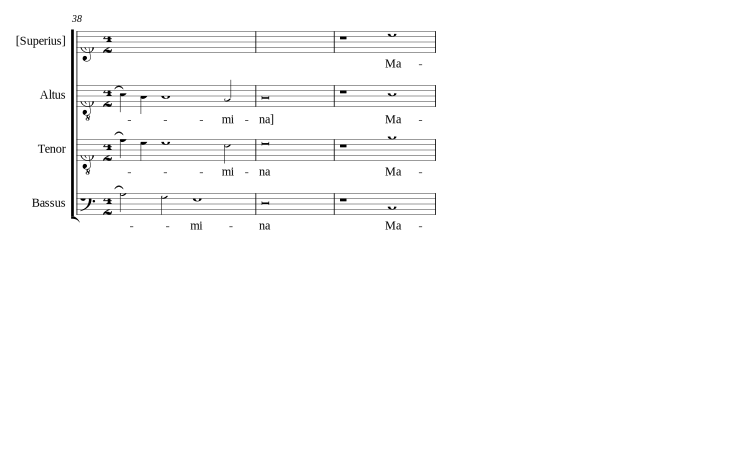

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  76
HR Stop Measure:  76
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  2


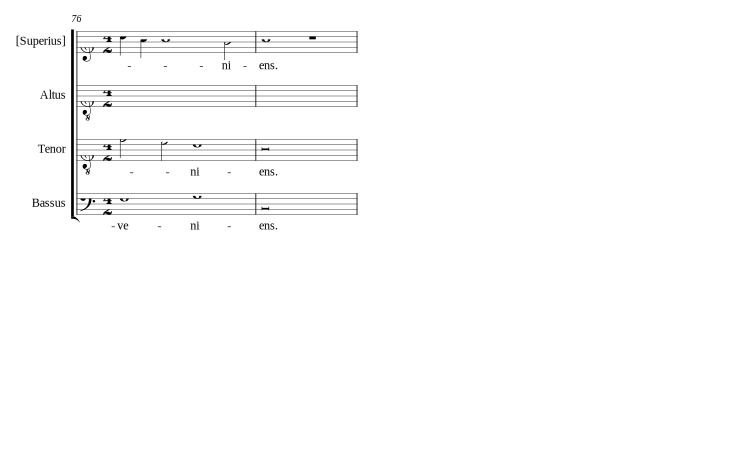

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  78
HR Stop Measure:  78
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  2


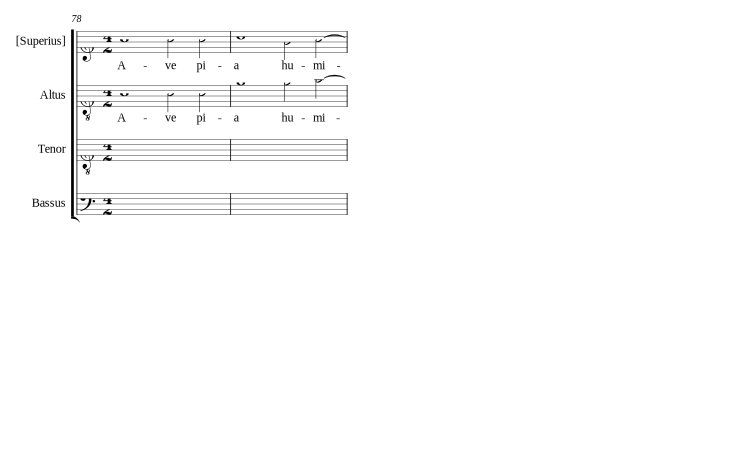

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  81
HR Stop Measure:  81
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  2


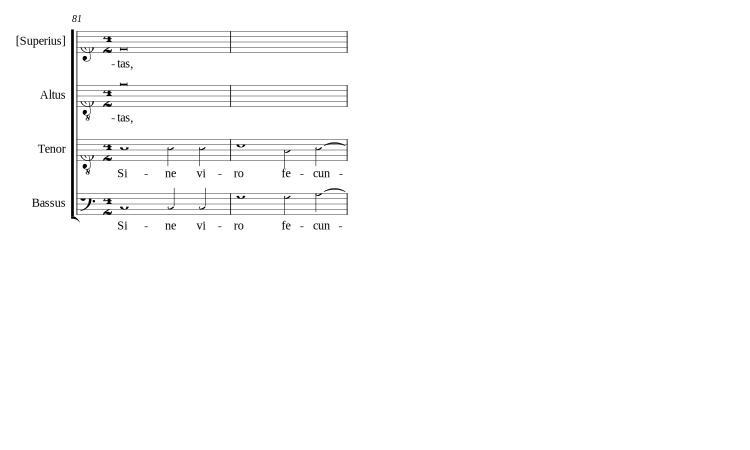

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  93
HR Stop Measure:  93
Minimum Number of HR Voices:  2
Maximum Number of HR Voices:  2


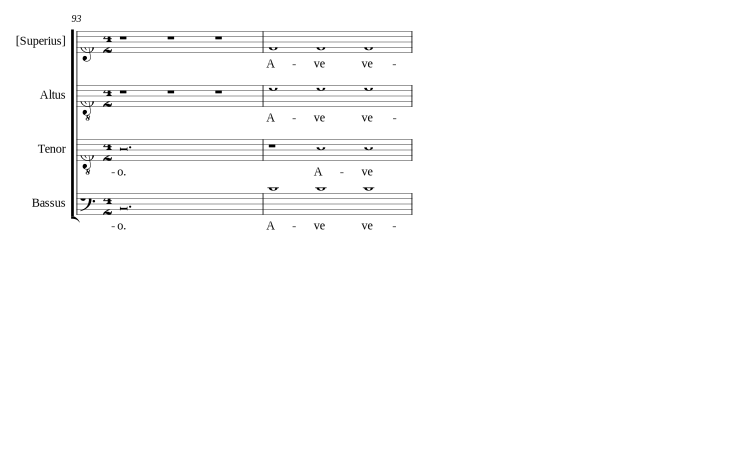

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  96
HR Stop Measure:  96
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  3


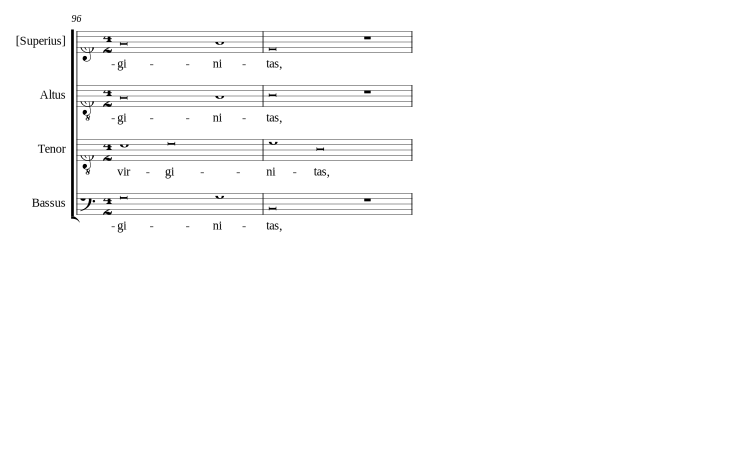

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  100
HR Stop Measure:  101
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  3


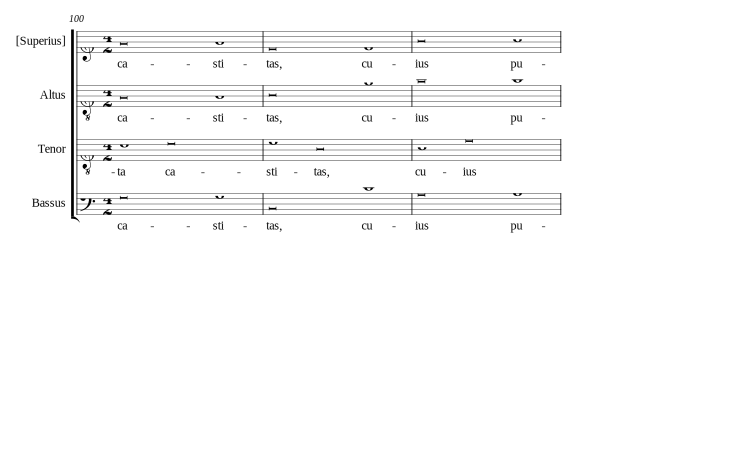

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  141
HR Stop Measure:  141
Minimum Number of HR Voices:  3
Maximum Number of HR Voices:  3


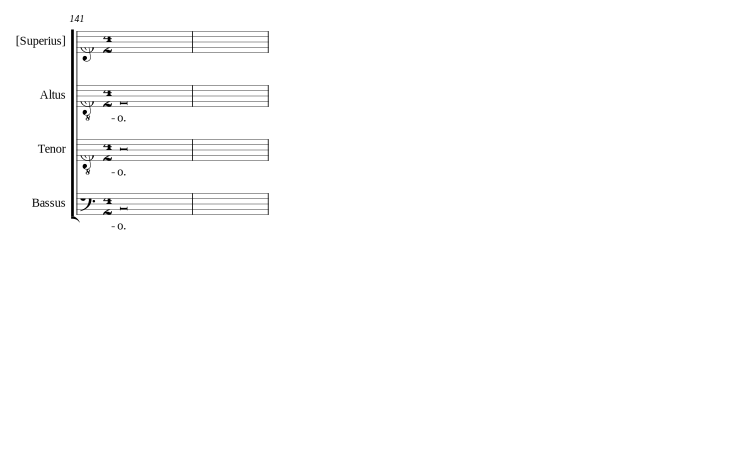

Results:
File Name:  CRIM_Model_0008
Josquin Des Prés
Ave Maria
HR Start Measure:  146
HR Stop Measure:  146
Minimum Number of HR Voices:  4
Maximum Number of HR Voices:  4


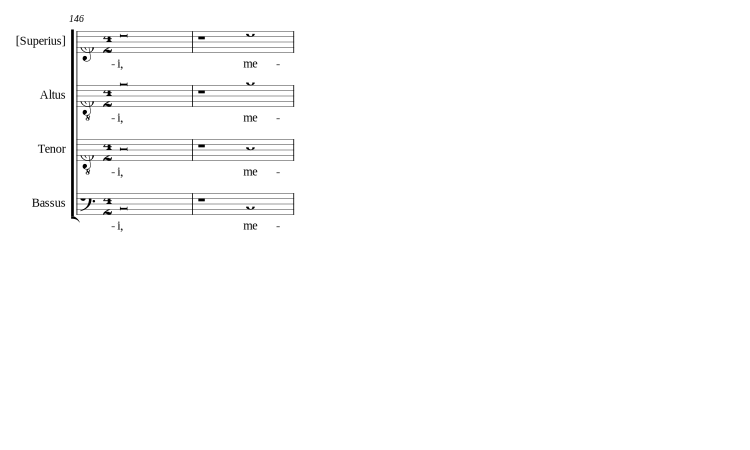

In [78]:
piece.verovioHomorhythm()

In [79]:
dir(crim_intervals)

['CorpusBase',
 'Crimport',
 'ET',
 'HTML',
 'ImportedPiece',
 'MEINS',
 'MEINSURI',
 'Network',
 'Path',
 'SVG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'abcFormat',
 'accepted_filetypes',
 'alpha',
 'alt',
 'analysis',
 'articulations',
 'audioSearch',
 'bar',
 'base',
 'beam',
 'braille',
 'capella',
 'chord',
 'clean_melody_new',
 'clef',
 'cm',
 'collections',
 'combinations',
 'common',
 'configure',
 'consecutive_groups',
 'converter',
 'corpus',
 'create_bar_chart',
 'create_comparisons_networks_and_interactive_df',
 'create_heatmap',
 'create_interactive_compare_df',
 'create_interval_networks',
 'crim_intervals',
 'cwd',
 'cwr',
 'datePattern',
 'defaults',
 'derivation',
 'duration',
 'dynamics',
 'editorial',
 'ema2ex',
 'environment',
 'exceptions21',
 'export_to_csv',
 'expressions',
 'features',
 'figuredBass',
 'fixed',
 'freezeThaw',
 'gatherNgrams',
 'generate_ngram

**Heatmap**

In [105]:
# define the model list
model_list = ['https://crimproject.org/mei/CRIM_Model_0010.mei', 'https://crimproject.org/mei/CRIM_Model_0011.mei', 'https://crimproject.org/mei/CRIM_Model_0014.mei']

# and the mass list:
mass_list = ['https://crimproject.org/mei/CRIM_Mass_0008_1.mei', 'https://crimproject.org/mei/CRIM_Mass_0008_2.mei', 'https://crimproject.org/mei/CRIM_Mass_0008_3.mei']

# now build each of these lists as a pair of corpora:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)

In [107]:
mod_corp = CorpusBase(model_list)
mass_corp = CorpusBase(mass_list)
module_matrix = mod_corp.moduleFinder(masses=mass_corp, models=mod_corp)
module_matrix

Model,CRIM_Model_0010,CRIM_Model_0011,CRIM_Model_0014
Mass,,,
CRIM_Mass_0008_1,0.540816,0.369898,0.369898
CRIM_Mass_0008_2,0.547421,0.439268,0.449251
CRIM_Mass_0008_3,0.491361,0.448164,0.455724


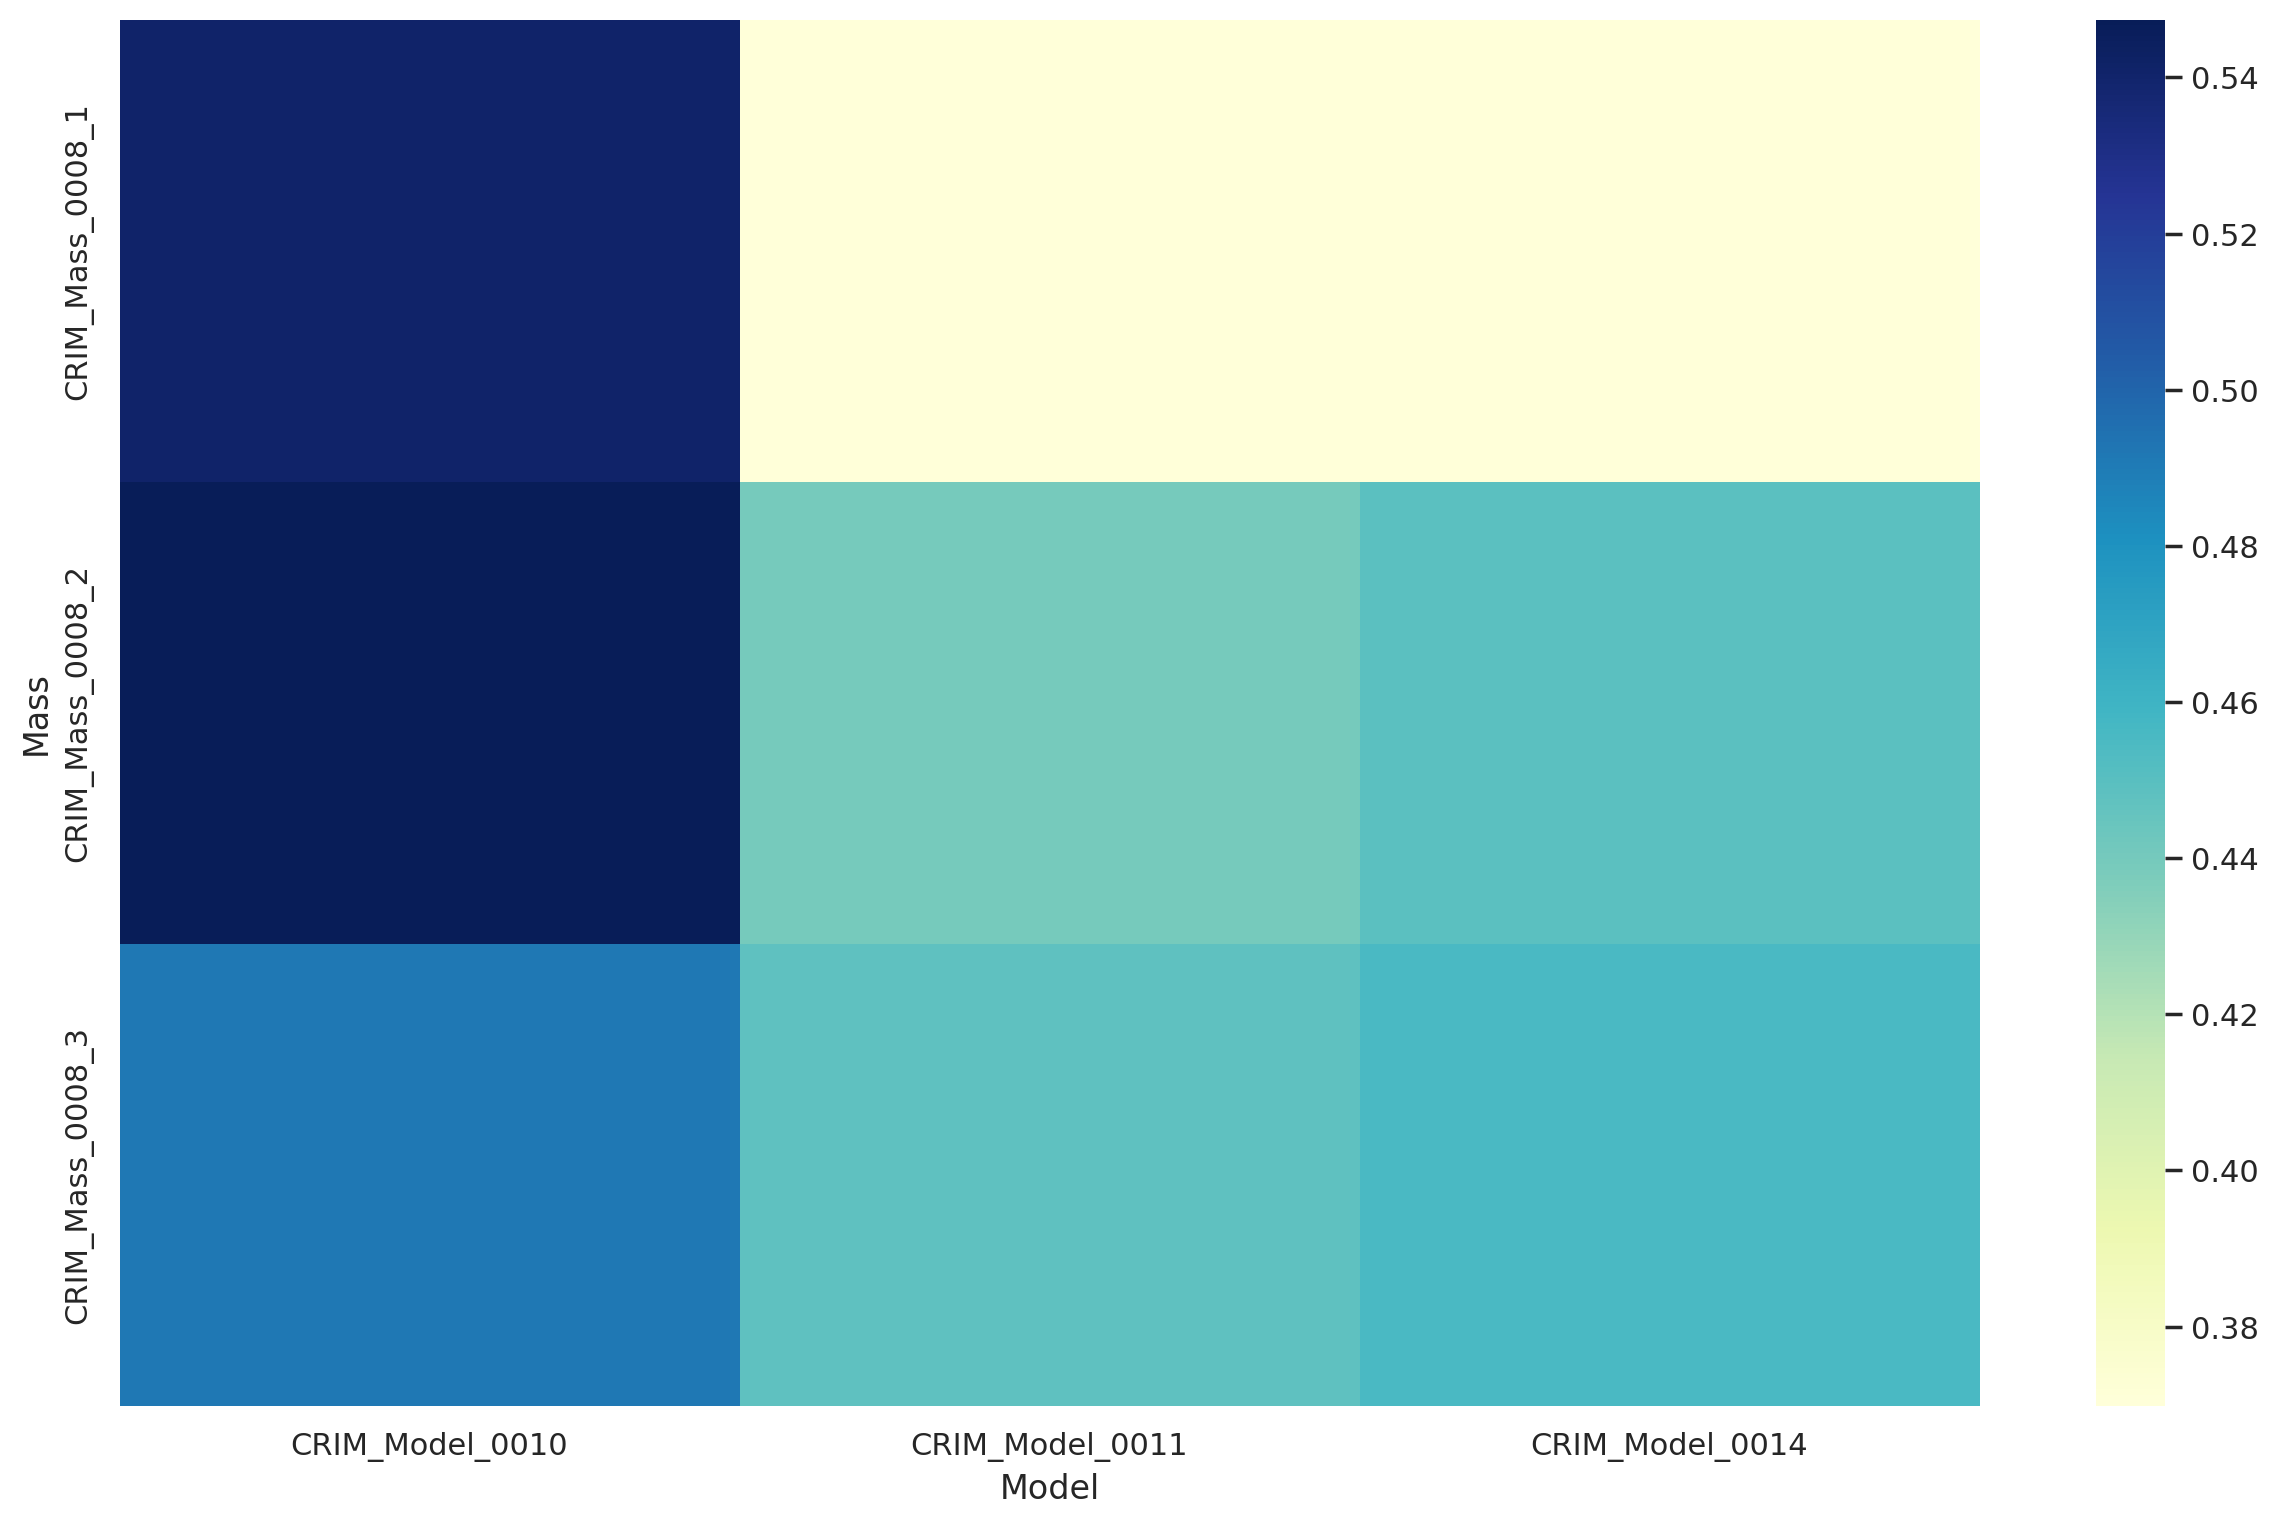

In [109]:
dataplot = sns.heatmap(module_matrix, cmap="YlGnBu", annot=False)
plt.show()

In [112]:
corpus_list = [
    'https://crimproject.org/mei/CRIM_Model_0008.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_1.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_2.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_3.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_4.mei', 
    'https://crimproject.org/mei/CRIM_Mass_0005_5.mei'
]

In [113]:
model = corpus_list[0] # <== the model will be score "0" in the previous list
model = importScore(model)

In [115]:
mass_movement = corpus_list[1] # <== select the index number of your mass movement from the corpus.  "1" is the Kyrie, "5" is the Agnus
mass_movement = importScore(mass_movement)
print(model.metadata, mass_movement.metadata)

{'title': 'Ave Maria', 'composer': 'Josquin Des Prés', 'date': 1502} {'title': 'Missa Ave Maria: Kyrie', 'composer': 'Antoine de Févin', 'date': 1515}


In [116]:
# set parameters:
thematic = True
anywhere = True
offset = True
progress = True
n = 4

In [117]:
model_entries = model.entries(thematic=thematic, anywhere=anywhere, n=n)
model_entries_det = model.detailIndex(model_entries, offset=offset, progress=progress)
model_entries_det

[Superius]                Altus  \
Measure Beat Offset Progress                                             
1       1.0  0.0    0.000000        (4, 2, 2, -3)                  NaN   
        3.0  4.0    0.003106     (2, 2, -3, Rest)                  NaN   
3       1.0  16.0   0.012422                  NaN        (4, 2, 2, -3)   
        3.0  20.0   0.015528                  NaN     (2, 2, -3, Rest)   
5       1.0  32.0   0.024845                  NaN                  NaN   
...                                           ...                  ...   
140     2.5  1179.0 0.915373                  NaN                  NaN   
143     1.0  1200.0 0.931677        (2, 2, 2, -2)  (2, -2, Rest, Rest)   
144     1.0  1208.0 0.937888                  NaN                  NaN   
        3.0  1212.0 0.940994  (2, -2, Rest, Rest)                  NaN   
147     3.0  1236.0 0.959627      (-2, -2, -2, 2)                  NaN   

                                       Tenor               Bassus  
Measure Beat Offset Progress                                       
1       1.0  0.0    0.000000             NaN                  NaN  
        3.0  4.0    0.003106             NaN                  NaN  
3       1.0  16.0   0.012422             NaN                  NaN  
        3.0  20.0   0.015528             NaN                  NaN  
5       1.0  32.0   0.024845   (4, 2, 2, -3)                  NaN  
...                                      ...                  ...  
140     2.5  1179.0 0.915373             NaN  (2, -2, Rest, Rest)  
143     1.0  1200.0 0.931677  (-2, -2, 2, 2)      (5, -2, -2, -2)  
144     1.0  1208.0 0.937888             NaN     (-2, -2, -2, -2)  
        3.0  1212.0 0.940994             NaN                  NaN  
147     3.0  1236.0 0.959627  (-2, 2, 2, -2)                  NaN  

[203 rows x 4 columns]

In [118]:
mass_movement_entries = mass_movement.entries(thematic=thematic, anywhere=anywhere, n=n)
mass_movement_entries_det = mass_movement.detailIndex(mass_movement_entries, offset=offset, progress=progress)

In [119]:
print(model_entries_det, mass_movement_entries_det)

                                       [Superius]                Altus  \
Measure Beat Offset Progress                                             
1       1.0  0.0    0.000000        (4, 2, 2, -3)                  NaN   
        3.0  4.0    0.003106     (2, 2, -3, Rest)                  NaN   
3       1.0  16.0   0.012422                  NaN        (4, 2, 2, -3)   
        3.0  20.0   0.015528                  NaN     (2, 2, -3, Rest)   
5       1.0  32.0   0.024845                  NaN                  NaN   
...                                           ...                  ...   
140     2.5  1179.0 0.915373                  NaN                  NaN   
143     1.0  1200.0 0.931677        (2, 2, 2, -2)  (2, -2, Rest, Rest)   
144     1.0  1208.0 0.937888                  NaN                  NaN   
        3.0  1212.0 0.940994  (2, -2, Rest, Rest)                  NaN   
147     3.0  1236.0 0.959627      (-2, -2, -2, 2)                  NaN   

                                     

In [120]:
model_entries = model.entries(thematic=True, anywhere=True, n=4)
model_entries_stack = model_entries.stack()
mass_movement_entries = mass_movement.entries(thematic=True, anywhere=True, n=4)
mass_movement_entries_stack = mass_movement_entries.stack()
shared_entries = list(set(mass_movement_entries_stack).intersection(model_entries_stack))
shared_entries = shared_entries[:]
shared_entries

[('2', '2', '2', '-2'),
 ('-2', '-2', '-2', '-2'),
 ('-2', '-2', '-2', '2'),
 ('4', '2', '2', '-3'),
 ('-3', '-2', '2', '2')]

In [121]:
nr = model.notes(combineUnisons=True)
mel = model.melodic(df=nr, kind='d', compound=True, unit=0, end=False) 
mel_ngrams = model.ngrams(df=mel, n=4) 
entry_ngrams = model.entries(df=mel, n=4) 
mel_ngrams_duration = model.durations(df=mel, n=4, mask_df=entry_ngrams) 
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[], includeCount=False)

alt.Chart(...)

In [123]:
nr = mass_movement.notes(combineUnisons=True) 
mel = mass_movement.melodic(df=nr, kind='d', compound=True, unit=0, end=False)
mel_ngrams = mass_movement.ngrams(df=mel, n=4)
entry_ngrams = mass_movement.entries(df=mel, n=4)
mel_ngrams_duration = mass_movement.durations(df=mel, n=4, mask_df=entry_ngrams)
viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=shared_entries, voices=[], includeCount=False)

alt.Chart(...)